# Transfer Learning

* 🤯 Tech companies and university labs have more computational resources than we do
* 😎 Let them train their super complex models on millions of images, and then re-use their kernels for our own CNNs!

🎯 **<u>Goal:</u>**
* ☄️ Use a **Pretrained Neural Network** $ \Leftrightarrow $ **Transfer learning**

## Google Colab Setup

Repeat the same process from the last challenge to upload your challenge folder and open your notebook:

1. access your [Google Drive](https://drive.google.com/)
2. go into the Colab Notebooks folder
3. drag and drop this challenge's folder into it
4. right-click the notebook file and select `Open with` $\rightarrow$ `Google Colaboratory`

Don't forget to enable GPU acceleration!

`Runtime` $\rightarrow$ `Change runtime type` $\rightarrow$ `Hardware accelerator` $\rightarrow$ `GPU`

When this is done, run the cells below and get to work!

In [ ]:
# Mount GDrive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Put Colab in the context of this challenge
import os

# os.chdir allows you to change directories, like cd in the Terminal
os.chdir('/content/drive/MyDrive/Colab Notebooks/data-transfer-learning')

You are now good to go, proceed with the challenge! Don't forget to copy everything back to your PC to upload to Kitt 🚀

## (1) What is a Pre-Trained Neural Network?

* Convolutions are mathematical operations designed to detect specific patterns in input images and use them to classify the images. 
* One could imagine that these patterns are not 100% specific to one task but to the input images. 

🚀 **Why not re-use these kernels - whose weights have already been optimized - somewhere else?** 
- The expectation is that the trained kernels could also help us perform another classification task.
- We are trying to ***transfer*** the knowledge of a trained CNN to a new classification task.


💪 Transfer Learning has two main advantages:
- It takes less time to train a pre-trained model since we are not going to update all the weights but only some of them
- You benefit from state-of-the-art architectures that have been trained on complex images. 

## (2) Introduction to  VGG16 

📚 ***Reading Section, no code***






In this exercise, we will use the <a href="https://neurohive.io/en/popular-networks/vgg16/">**`VGG-16 Neural Network`**</a>.

> VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous model submitted to ILSVRC-2014. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another. VGG16 was trained for weeks and was using NVIDIA Titan Black GPU’s.

VGG16 is a well-known architecture that has been trained on the <a href="https://www.image-net.org/">**`ImageNet dataset`**</a> which is a very large database of images which belong to different categories. 

👉 This architecture already learned which kernels are the best for extracting features from the images found in the `ImageNet dataset`.

👉 As you can see in the illustration, the VGG16 involves millions of parameters you don't want to retrain yourself.


<center><img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png" width=400></center>

❓ How does it work in practice ❓

* The first layers are not specialized for the particular task the VGG16 CNN was trained on
* Only the last dense layer is a "classification layers" that can be preceded with a couple of dense layers...  Therefore, we will: 
    1. Load the existing VGG16 network
    2. Remove the last fully connected layers
    3. Replace them with some new fully-connected layers (whose weights are randomly set)
    4. Train these last layers on a specific classification task. 

😃 Your role is to train only the last layers for your particular problem.

🤓 We will use <a href="https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16">**`tensorflow.keras.applications.VGG16`**</a>

<hr>

## (3) Data loading & Preprocessing

You have two options to load the data into Google Colab.

### (Option 1) Loading the data directly

* You can first get the data onto google Colab thanks to:

`!wget https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip`,

* and then run 

`!unzip flowers-dataset.zip`

*This is a very easy option to load the data into your working directory.*

### (Option 2) Adding the data to Google Drive

* You can first download the data from `https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip`. 
* Then you have to add it to your Google Drive in a folder called `Deep_learning_data` (for instance)
* And run the following code in the notebook: 

```python
from google.colab import drive
drive.mount('/content/drive/')
```

* The previous code will ask you to go to a given webpage where you can copy a temporary key
* Paste it in the cell that will appear in your Colab Notebook
* You can now load the data on your Google Colab Notebooks

### Option 1 or Option 2 ?

* Why choosing option 2 over the option 1? 
    * ✅ The combo Colab + Drive can be interesting if you work within a project team, and need to update the data from time to time. 
    * ✅ By doing this, you can share the same data folder with your teammates, and be sure that everyone has the same dataset at any time, even though someone changes it. 
    * ❌ Google Colab has now access to your Google Folder..., which you may or may not be in favor of, depending on your sensibilities...

---

❓ **Question: Loading your dataset** ❓ 
    
Use one of the above methods to load your data

In [1]:
option_1 = True # Choose here

if option_1:
    !wget https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip
    !unzip flowers-dataset.zip
else:
    from google.colab import drive
    drive.mount('/content/drive/')

--2023-02-19 13:02:09--  https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip
Resolving wagon-public-datasets.s3.amazonaws.com (wagon-public-datasets.s3.amazonaws.com)... 52.92.18.57, 52.218.29.210, 52.218.100.154, ...
Connecting to wagon-public-datasets.s3.amazonaws.com (wagon-public-datasets.s3.amazonaws.com)|52.92.18.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104983809 (100M) [application/zip]
Saving to: ‘flowers-dataset.zip’

flowers-dataset.zip 100%[===================>] 100.12M  5.72MB/s    in 17s     

2023-02-19 13:02:26 (5.94 MB/s) - ‘flowers-dataset.zip’ saved [104983809/104983809]

Archive:  flowers-dataset.zip
  inflating: flowers/daisy/2607132536_d95198e619_n.jpg  
  inflating: flowers/daisy/6480809771_b1e14c5cc2_m.jpg  
  inflating: flowers/daisy/9350942387_5b1d043c26_n.jpg  
  inflating: flowers/daisy/4065883015_4bb6010cb7_n.jpg  
  inflating: flowers/daisy/7924174040_444d5bbb8a.jpg  
  inflating: flowers/daisy/8740807508_0

  inflating: flowers/rose/505517255_cfbb6f6394.jpg  
  inflating: flowers/rose/4553266758_09d4dbdac9_n.jpg  
  inflating: flowers/dandelion/4632761610_768360d425.jpg  
  inflating: flowers/daisy/2538504987_fe524b92a8_n.jpg  
  inflating: flowers/daisy/4697206799_19dd2a3193_m.jpg  
  inflating: flowers/rose/4505921907_21c8002fde.jpg  
  inflating: flowers/rose/4504220673_af754fcb40_n.jpg  
  inflating: flowers/dandelion/2670304799_a3f2eef516_m.jpg  
  inflating: flowers/dandelion/2512148749_261fa9d156.jpg  
  inflating: flowers/daisy/4858518329_7563eb0baa_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/dandelion/4601270210_60136f2b87_n.jpg  
  inflating: flowers/dandelion/7162551630_3647eb9254.jpg  
  inflating: flowers/daisy/14372713423_61e2daae88.jpg  
  inflating: flowers/daisy/5434742166_35773eba57_m.jpg  
  inflating: flowers/daisy/13901930939_a7733c03f0_n.jpg  
  inflating: flowers/dandelion/4606893762_c2f26c7e91_n.jpg  
  inflating: flowers/

  inflating: flowers/rose/5073473370_bdbb5a99fc.jpg  
  inflating: flowers/daisy/34476770012_38fba290f3_n.jpg  
  inflating: flowers/daisy/17027891179_3edc08f4f6.jpg  
  inflating: flowers/dandelion/146242691_44d9c9d6ce_n.jpg  
  inflating: flowers/dandelion/34692530906_fe2470a5e5_n.jpg  
  inflating: flowers/rose/4588034197_e300b0872a_n.jpg  
  inflating: flowers/daisy/9221345475_67735dbf4f_n.jpg  
  inflating: flowers/dandelion/8701999625_8d83138124.jpg  
  inflating: flowers/dandelion/13560152823_9da5e48c87_m.jpg  
  inflating: flowers/daisy/14307766919_fac3c37a6b_m.jpg  
  inflating: flowers/daisy/14485782498_fb342ec301.jpg  
  inflating: flowers/dandelion/19602790836_912d38aaa8.jpg  
  inflating: flowers/daisy/5714327423_50af0cffe9.jpg  
  inflating: flowers/daisy/16291797949_a1b1b7c2bd_n.jpg  
  inflating: flowers/dandelion/1080179756_5f05350a59.jpg  
  inflating: flowers/rose/4612826243_7d86870a1b_n.jpg  
  inflating: flowers/daisy/14272874304_47c0a46f5a.jpg  
  inflating: flowe

  inflating: flowers/dandelion/6897671808_57230e04c5_n.jpg  
  inflating: flowers/daisy/4511693548_20f9bd2b9c_m.jpg  
  inflating: flowers/dandelion/3419172904_7708414ae9_n.jpg  
  inflating: flowers/daisy/15813862117_dedcd1c56f_m.jpg  
  inflating: flowers/daisy/4278442064_a5a598524b_m.jpg  
  inflating: flowers/rose/2677417735_a697052d2d_n.jpg  
  inflating: flowers/dandelion/17862580326_293070978d_m.jpg  
  inflating: flowers/daisy/14707111433_cce08ee007.jpg  
  inflating: flowers/daisy/34718882165_68cdc9def9_n.jpg  
  inflating: flowers/dandelion/34311470786_5b2b5bea1d_n.jpg  
  inflating: flowers/daisy/4258408909_b7cc92741c_m.jpg  
  inflating: flowers/dandelion/2596413098_7ef69b7e1d_m.jpg  
  inflating: flowers/rose/4504731519_9a260b6607_n.jpg  
  inflating: flowers/dandelion/34351608230_f95038a5a4_n.jpg  
  inflating: flowers/daisy/3695826945_9f374e8a00_m.jpg  
  inflating: flowers/dandelion/6994938270_bf51d0fe63.jpg  
  inflating: flowers/dandelion/5140791232_52f2c5b41d_n.jpg  

  inflating: flowers/dandelion/19397467530_1e8131a7cf.jpg  
  inflating: flowers/rose/5182167964_9d1a0be0b8_n.jpg  
  inflating: flowers/daisy/169371301_d9b91a2a42.jpg  
  inflating: flowers/dandelion/34527583252_79aafda601_n.jpg  
  inflating: flowers/daisy/34275152390_44e7262261_n.jpg  
  inflating: flowers/daisy/15029936576_8d6f96c72c_n.jpg  
  inflating: flowers/dandelion/6983120596_8b9f084ac2_n.jpg  
  inflating: flowers/dandelion/8691437509_9ac8441db7_n.jpg  
  inflating: flowers/dandelion/2516714633_87f28f0314.jpg  
  inflating: flowers/daisy/20289938802_e16fa9f23d.jpg  
  inflating: flowers/dandelion/5873232330_59818dee03_n.jpg  
  inflating: flowers/rose/2065522422_cfdd80044a_n.jpg  
  inflating: flowers/daisy/33843240613_0b736f9896_n.jpg  
  inflating: flowers/daisy/23095658544_7226386954_n.jpg  
  inflating: flowers/daisy/5434913005_409c1e8b56_n.jpg  
  inflating: flowers/rose/5001853887_0623dd2111_n.jpg  
  inflating: flowers/dandelion/34339792440_8224ca420d_n.jpg  
  infla

  inflating: flowers/dandelion/8759118120_9eac064e38_n.jpg  
  inflating: flowers/dandelion/12998979765_3de89e7195_n.jpg  
  inflating: flowers/dandelion/4571681134_b605a61547_n.jpg  
  inflating: flowers/dandelion/2465573725_d78caca9d4_n.jpg  
  inflating: flowers/dandelion/480621885_4c8b50fa11_m.jpg  
  inflating: flowers/dandelion/7448453384_fb9caaa9af_n.jpg  
  inflating: flowers/daisy/5896680664_641de2de5a_n.jpg  
  inflating: flowers/daisy/34517409722_829ec7e152_n.jpg  
  inflating: flowers/dandelion/8980460785_b5e6842e59_n.jpg  
  inflating: flowers/dandelion/176284193_8fa1710431_m.jpg  
  inflating: flowers/dandelion/17831860736_3e44667bbb_n.jpg  
  inflating: flowers/dandelion/5045509402_6e052ce443.jpg  
  inflating: flowers/daisy/34638378196_216d5bbc2e_n.jpg  
  inflating: flowers/daisy/5110107234_12ddc0206b_m.jpg  
  inflating: flowers/rose/5001850247_33681cc95c_n.jpg  
  inflating: flowers/dandelion/7148085703_b9e8bcd6ca_n.jpg  
  inflating: flowers/rose/394990940_7af082cf8

  inflating: flowers/dandelion/10043234166_e6dd915111_n.jpg  
  inflating: flowers/rose/12240303_80d87f77a3_n.jpg  
  inflating: flowers/dandelion/1193386857_3ae53574f2_m.jpg  
  inflating: flowers/daisy/34652819496_0b6f758986_n.jpg  
  inflating: flowers/dandelion/3476759348_a0d34a4b59_n.jpg  
  inflating: flowers/dandelion/5605093210_5fecb71c61.jpg  
  inflating: flowers/dandelion/5716633491_55e6f02645_n.jpg  
  inflating: flowers/daisy/8696022686_1f8d62c5cb_m.jpg  
  inflating: flowers/dandelion/33907694863_f7c0f23ef3_n.jpg  
  inflating: flowers/daisy/5608389827_a42a46f760.jpg  
  inflating: flowers/daisy/5693459303_e61d9a9533.jpg  
  inflating: flowers/rose/4713531680_1110a2fa07_n.jpg  
  inflating: flowers/dandelion/2019520447_48b2354a20_m.jpg  
  inflating: flowers/rose/4363734507_5cc4ed6e01.jpg  
  inflating: flowers/dandelion/3585220976_5acac92d1c.jpg  
  inflating: flowers/dandelion/8168031302_6e36f39d87.jpg  
  inflating: flowers/daisy/34289553800_606f1f2954_n.jpg  
  inflat

  inflating: flowers/rose/3415176946_248afe9f32.jpg  
  inflating: flowers/dandelion/34678209886_9005f29b47_n.jpg  
  inflating: flowers/dandelion/16041975_2f6c1596e5.jpg  
  inflating: flowers/dandelion/16911008669_ea21fd8915_n.jpg  
  inflating: flowers/daisy/33837577463_1ae52a3726_n.jpg  
  inflating: flowers/daisy/525271784_013ddccd1b_m.jpg  
  inflating: flowers/dandelion/14200639491_2a4611916d_n.jpg  
  inflating: flowers/dandelion/8720503800_cab5c62a34.jpg  
  inflating: flowers/dandelion/4624036600_11a4744254_n.jpg  
  inflating: flowers/dandelion/148698493_5710e5f472.jpg  
  inflating: flowers/dandelion/4336536446_e635f48f2e.jpg  
  inflating: flowers/dandelion/4589787911_851cb80157_n.jpg  
  inflating: flowers/dandelion/4573886524_5161482ca7_n.jpg  
  inflating: flowers/dandelion/23192507093_2e6ec77bef_n.jpg  
  inflating: flowers/daisy/7320089276_87b544e341.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/2621723097_736febb4a4_n.jpg 

  inflating: flowers/dandelion/14404468648_37903d7025_m.jpg  
  inflating: flowers/dandelion/34729107795_c746845e17_n.jpg  
  inflating: flowers/dandelion/18243329421_771b4d938e.jpg  
  inflating: flowers/dandelion/13968424321_1d89b33a9f_n.jpg  
  inflating: flowers/dandelion/18996760154_58d3c48604.jpg  
  inflating: flowers/dandelion/2470731130_089b8514f6_n.jpg  
  inflating: flowers/dandelion/8647874151_aac8db2588_m.jpg  
  inflating: flowers/daisy/18901817451_43e2b45f6c.jpg  
  inflating: flowers/dandelion/13920113_f03e867ea7_m.jpg  
  inflating: flowers/dandelion/3393060921_2328b752f4.jpg  
  inflating: flowers/dandelion/6044710875_0459796d1b_m.jpg  
  inflating: flowers/dandelion/34533729452_7d8e2b519d_n.jpg  
  inflating: flowers/dandelion/26004221274_74900d17e1_n.jpg  
  inflating: flowers/dandelion/8475758_4c861ab268_m.jpg  
  inflating: flowers/dandelion/477316928_a70a31a704_m.jpg  
  inflating: flowers/dandelion/34562659841_caba988a0c_n.jpg  
  inflating: flowers/daisy/931022

  inflating: flowers/rose/5001854803_cb87747d4a_n.jpg  
  inflating: flowers/dandelion/7116950607_49b19102ba_n.jpg  
  inflating: flowers/dandelion/18587334446_ef1021909b_n.jpg  
  inflating: flowers/dandelion/18215579866_94b1732f24.jpg  
  inflating: flowers/dandelion/5863928177_8ae1425e76_n.jpg  
  inflating: flowers/dandelion/4500964841_b1142b50fb_n.jpg  
  inflating: flowers/dandelion/34560984002_254f326f12_n.jpg  
  inflating: flowers/rose/4654893119_45d232016b.jpg  
  inflating: flowers/daisy/34611565966_9de274f987_n.jpg  
  inflating: flowers/daisy/5796562389_ae43c83317_m.jpg  
  inflating: flowers/dandelion/3496258301_ca5f168306.jpg  
  inflating: flowers/dandelion/18479635994_83f93f4120.jpg  
  inflating: flowers/dandelion/4847150510_7a5db086fa.jpg  
  inflating: flowers/dandelion/8733226215_161309f8ec.jpg  
  inflating: flowers/dandelion/5715788902_9dd2b4ef1d.jpg  
  inflating: flowers/dandelion/3580443099_9a6902ebd8_n.jpg  
  inflating: flowers/daisy/3962240986_0661edc43a_n.

  inflating: flowers/dandelion/13916196427_50a611008f.jpg  
  inflating: flowers/dandelion/14761980161_2d6dbaa4bb_m.jpg  
  inflating: flowers/dandelion/578938011_34918b1468.jpg  
  inflating: flowers/daisy/18582579815_4c6637e9ff_m.jpg  
  inflating: flowers/dandelion/16375088191_2bf2916b53.jpg  
  inflating: flowers/daisy/21805938544_bf6bb0e4bc.jpg  
  inflating: flowers/daisy/14551098743_2842e7a004_n.jpg  
  inflating: flowers/daisy/8938566373_d129e7af75.jpg  
  inflating: flowers/dandelion/34335432530_cd667cbb19_n.jpg  
  inflating: flowers/dandelion/14060367700_fe87e99b6a_m.jpg  
  inflating: flowers/dandelion/7197581386_8a51f1bb12_n.jpg  
  inflating: flowers/daisy/8063844363_db3f4dea85.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/dandelion/5727534342_419604c177_n.jpg  
  inflating: flowers/rose/218630974_5646dafc63_m.jpg  
  inflating: flowers/dandelion/455728598_c5f3e7fc71_m.jpg  
  inflating: flowers/daisy/12701063955_4840594ea6_n.jpg  
  in

In [2]:
!pwd

/Users/bingobango/code/lewagon/data-transfer-learning


In [3]:
!ls

README.md               flowers-dataset.zip
flowers                 transfer_learning.ipynb


❓ **Question:Train/Val/Test split** ❓ 

Use the following method to create 
`X_train, y_train, X_val, y_val, X_test, y_test, num_classes` depending on the `loading_method` you have used

In [4]:
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import numpy as np
import os
from PIL import Image

def load_flowers_data(loading_method):
    if loading_method == 'colab':
        data_path = '/content/drive/My Drive/Deep_learning_data/flowers'
    elif loading_method == 'direct':
        data_path = 'flowers/'
    classes = {'daisy':0, 'dandelion':1, 'rose':2}
    imgs = []
    labels = []
    for (cl, i) in classes.items():
        images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0]
        for img in tqdm(images_path[:300]):
            path = os.path.join(data_path, cl, img)
            if os.path.exists(path):
                image = Image.open(path)
                image = image.resize((256, 256))
                imgs.append(np.array(image))
                labels.append(i)

    X = np.array(imgs)
    num_classes = len(set(labels))
    y = to_categorical(labels, num_classes)

    # Finally we shuffle:
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]

    first_split = int(len(imgs) /6.)
    second_split = first_split + int(len(imgs) * 0.2)
    X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
    y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test, num_classes

2023-02-19 13:03:18.387976: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# CALL load_flowers_data WITH YOUR PREFERRED METHOD HERE
X_train, y_train, X_val, y_val, X_test, y_test, num_classes = load_flowers_data('direct')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 299/299 [00:00<00:00, 333.22it/s]


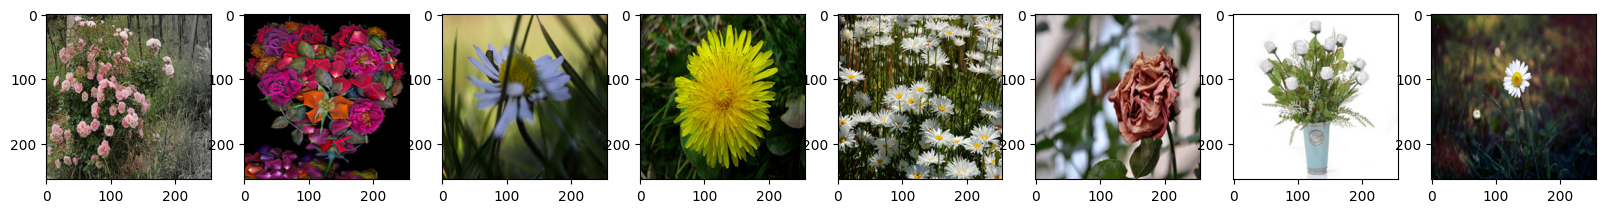

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(X_train[i])

❓ **Question: Exploring the images** ❓

Check the images' shapes and plot a few of them.

## (4) A CNN architecture

First, let's build our own CNN.

❓ **Questions** ❓ 

1. <u>CNN Architecture and compiler:</u> Create a CNN with your own architecture and a function `load_own_model` that will be able to generate it. Some advice:
    - Incorporate the Rescaling Layer in your Sequential architecture
    - Add three Conv2D/MaxPooling2D combinations with an increasing number of channels and a decreasing size of kernels for example (be creative, that is not a rule of thumb, mastering CNN is an art)
    - Don't forget the Flatten layer and some hidden layers
    - Finish with the predictive layer
    - Compile your CNN model accordingly
  
  
2. <u>Training and comparison</u>:
    - Train your CNN
    - Compare its performance to a baseline accuracy

<details>
    <summary><i>Recommended architecture:</i></summary>

```python
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

model = Sequential()

# Notice this cool new layer that "pipe" your rescaling within the architecture
model.add(Rescaling(1./255, input_shape=(256,256,3)))

# Lets add 3 convolution layers, with relatively large kernel size as our pictures are quite big too
model.add(layers.Conv2D(16, kernel_size=10, activation='relu'))
model.add(layers.MaxPooling2D(3))

model.add(layers.Conv2D(32, kernel_size=8, activation="relu"))
model.add(layers.MaxPooling2D(3))

model.add(layers.Conv2D(32, kernel_size=6, activation="relu"))
model.add(layers.MaxPooling2D(3))

model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
```

        
</details>        

In [ ]:
test_accuracy = res[-1]
print(f"test_accuracy = {round(test_accuracy,2)*100} %")

🥡 <b><u>Takeaways from building your own CNN</u></b>:
* On an "easy dataset" like the MNIST, it is now easy to reach a decent accuracy. But for a more complicated problem like classifying flowers, it already becomes more challenging. Take a few minutes to play with the following link before moving on to Transfer Learning
    * [PoloClub/CNN-Explainer](https://poloclub.github.io/cnn-explainer/)

## (5) Using a pre-trained CNN = Transfer learning

As we said in the beginning, tech companies and university labs have more computational resources than we do.

🔥 The [**Visual Geometry Group**](https://www.robots.ox.ac.uk/~vgg/data/) *(Oxford University, Department of Science and Engineering)* became famous for some of their **Very Deep Convolutional Neural Networks**: the [**VGG16**](https://www.robots.ox.ac.uk/~vgg/research/very_deep/)

Take 7 minutes of your time to watch this incredible video of Convolutional Layers created by Dimitri Dmitriev.

* 📺 **[VGG16 Neural Network Visualization](https://www.youtube.com/watch?v=RNnKtNrsrmg)**


### (5.1) Load VGG16 model

❓ **Question: loading the VGG16** ❓ 

* Write a first function `load_model()` that loads the pretrained VGG-16 model from `tensorflow.keras.applications.vgg16`. Have a look at the documentation 📚  [tf/keras/applications/VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16)📚

* We will **load the VGG16 model** the following way:
    - 🤯 Let's use the **weights** learned on the [**imagenet dataset**](https://www.image-net.org/download.php) (14M pictures with 20k labels)
    - The **`input_shape`** corresponds to the input shape of your images 
        - Note: *You have to resize them down to a consistent shape if they have different height/widths/channels*
    - The **`include_top`** argument should be set to `False`: 
        - to avoid loading the weights of the fully-connected layers of the VGG16
        - and also remove the last layer of the VGG16 which was specifically trained on `imagenet`

<i><u>Remark:</u></i> Do not change the default value of the other arguments

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():
    
    pass  # YOUR CODE HERE
    
    return model

❓ **Question: number of parameters in the VGG16** ❓ 

Look at the architecture of the model using ***.summary()***

In [ ]:
# YOUR CODE HERE

<img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png">

💪 Impressive, right? Two things to notice:
- It ends with a combo Conv2D/MaxPooling2D 
- The `layers.Flatten` and the `layers.Dense` are not there yet, we need to add them.
- There are more than 14,000,000 parameters, which is a lot... 
    - We could fine-tune them, i.e. update them as we will update the weights of the dense layers, but it will take a lot of time....
    - For this reason, we will inform the model that the layers before the flattening will be set non-trainable.

---

❓ **Question: deactivating the training of the VGG16 paramters** ❓ 

* Write a first function which:
    - takes the previous model as the input
    - sets the first layers to be non-trainable, by applying **`model.trainable = False`**
    - returns the model.

* Then inspect the summary of the model to check that the parameters are no longer trainable, they were set to be **`non-trainable`**.



In [ ]:
def set_nontrainable_layers(model):
    
    pass  # YOUR CODE HERE
    
    return model

❓ **Question: chaining the pretrained convolutional layers of VGG16 with our own dense layers** ❓ 

We will write a function that adds flattening and dense layers after the convolutional layers. To do so, we cannot directly use the classic `layers.Sequential()` instantiation.

For that reason, we will discover another way here. The idea is that we define each layer (or group of layers) separately. Then, we concatenate them. Have a look at this example: 

---
```python
base_model = load_model()
base_model = set_nontrainable_layers(base_model)
flattening_layer = layers.Flatten()
dense_layer = layers.Dense(SOME_NUMBER_1, activation='relu')
prediction_layer = layers.Dense(SOME_NUMBER_2, activation='APPROPRIATE_ACTIVATION')

model = tf.keras.Sequential([
  base_model,
  flattening_layer,
  dense_layer,
  prediction_layer
])

```
---

* The first line loads a group of layers which is the previous VGG-16 model. 
* Then, we set these layers to be non-trainable.
* Eventually, we can instantiate as many layers as we want.
* Finally, we use the `Sequential` with the sequence of layers that will correspond to our overall neural network. 

Replicate the following steps by adding:
* a flattening layer
* two dense layers (the first with 500 neurons) to the previous VGG-16 model.

In [ ]:
from tensorflow.keras import layers, models

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainable, and add additional trainable layers on top'''
    pass  # YOUR CODE HERE
    return model

❓ **Question: inspect the parameters of a customized VGG16** ❓ 

* Now look at the layers and the parameters of your model. 
* Note that there is a distinction, at the end, between the **trainable** and **non-trainable parameters**

In [ ]:
# YOUR CODE HERE

❓ **Question: building a function that creates a full customized VGG16 and compiles it** ❓ 

* Write a function which builds and compiles your model
    * We advise using the _adam_ optimizer with `learning_rate=1e-4`. 

In [ ]:
from tensorflow.keras import optimizers

def build_model():
    pass  # YOUR CODE HERE

### (5.2) Back to the data

🚨 The VGG16 model was trained on images which were preprocessed in a specific way. This is the reason why we did _NOT_ normalize them earlier.

❓ **Question: preprocessing the dataset** ❓ 

Apply the specific processing to the original (non-normalized) images here using the method **`preprocess_input`** that you can import from **`tensorflow.keras.applications.vgg16`**

📚 Cf. [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
# YOUR CODE HERE

### (5.3)  Fit the model



❓ **Question: Training the customized VGG16** ❓ 

* Train the model with an Early stopping criterion on the validation accuracy -
* Since the validation data is provided use `validation_data` instead of `validation_split`.

_As usual, store the results of your training into a `history` variable._

In [ ]:
# YOUR CODE HERE

❓ **Question: Looking at the accuracy** ❓ 

Plot the accuracy for both the train set and and the validation set using the usual function below

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

In [ ]:
# YOUR CODE HERE

❓ **Question: Evaluating the model** ❓

Evaluate the customized VGG16 accuracy on the test set. Did we improve?

In [ ]:
# YOUR CODE HERE

## (6) (Optional) Improve the model

Now, you can try to improve the model's test accuracy. To do that, here are some options you can consider

1. **Unfreeze and finetune**: Source: [Google tutorial](https://www.tensorflow.org/guide/keras/transfer_learning#fine-tuning) 
>_Once your model has converged on the new data, you can try to unfreeze all or part of the base model and retrain the whole model end-to-end with a very low learning rate. This is an optional last step that can potentially give you incremental improvements. It could also potentially lead to quick overfitting -- keep that in mind. It is critical to only do this step after the model with frozen layers has been trained to convergence. If you mix randomly-initialized trainable layers with trainable layers that hold pre-trained features, the randomly-initialized layers will cause very large gradient updates during training, which will destroy your pre-trained features. It's also critical to use a very low learning rate at this stage, because you are training a much larger model than in the first round of training, on a dataset that is typically very small. As a result, you are at risk of overfitting very quickly if you apply large weight updates. Here, you only want to readapt the pretrained weights in an incremental way._


1. Add **Data Augmentation** if your model is overfitting. 

2. If your model is not overfitting, try a more complex model.

3. Perform a precise **Grid Search** on all the hyper-parameters: learning_rate, batch_size, data augmentation etc...

4. **Change the base model** to more modern one CNN (ResNet, EfficientNet1,... available in the keras library)

5. Curate the data: maintaining a sane data set is one of the keys to success.

6. Collect more data

## (6.2) Comparing the performances of the CNN, the VGG, and the VGG trained on the augmented dataset

In [ ]:
test_accuracy_aug = res_aug[-1]


print(f"test_accuracy_aug = {round(test_accuracy_aug,2)*100} %")

print(f"test_accuracy_vgg = {round(test_accuracy_vgg,2)*100} %")

print(f"test_accuracy = {round(test_accuracy,2)*100} %")

print(f'Chance level: {1./num_classes*100:.1f}%')



---

🏁 **Congratulations** 🏁 

1. Download this notebook from your `Google Drive` or directly from `Google Colab` 
2. Drag-and-drop it from your `Downloads` folder to your local challenge folder  


💾 Don't forget to push your code

3. Follow the usual procedure on your terminal inside the challenge folder:
      * *git add transfer_learning.ipynb*
      * *git commit -m "I am the god of Transfer Learning"*
      * *git push origin master*

*Hint*: To find where this Colab notebook has been saved, click on `File` $\rightarrow$ `Locate in Drive`.

🚀 If you have time, move on to the **Autoencoders** challenge!